# Training and Validation

In [0]:
from fastai.vision import *

In [0]:
train_path = 'ICLR/train/train'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(train_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [0]:
data.classes

['healthy_wheat', 'leaf_rust', 'stem_rust']

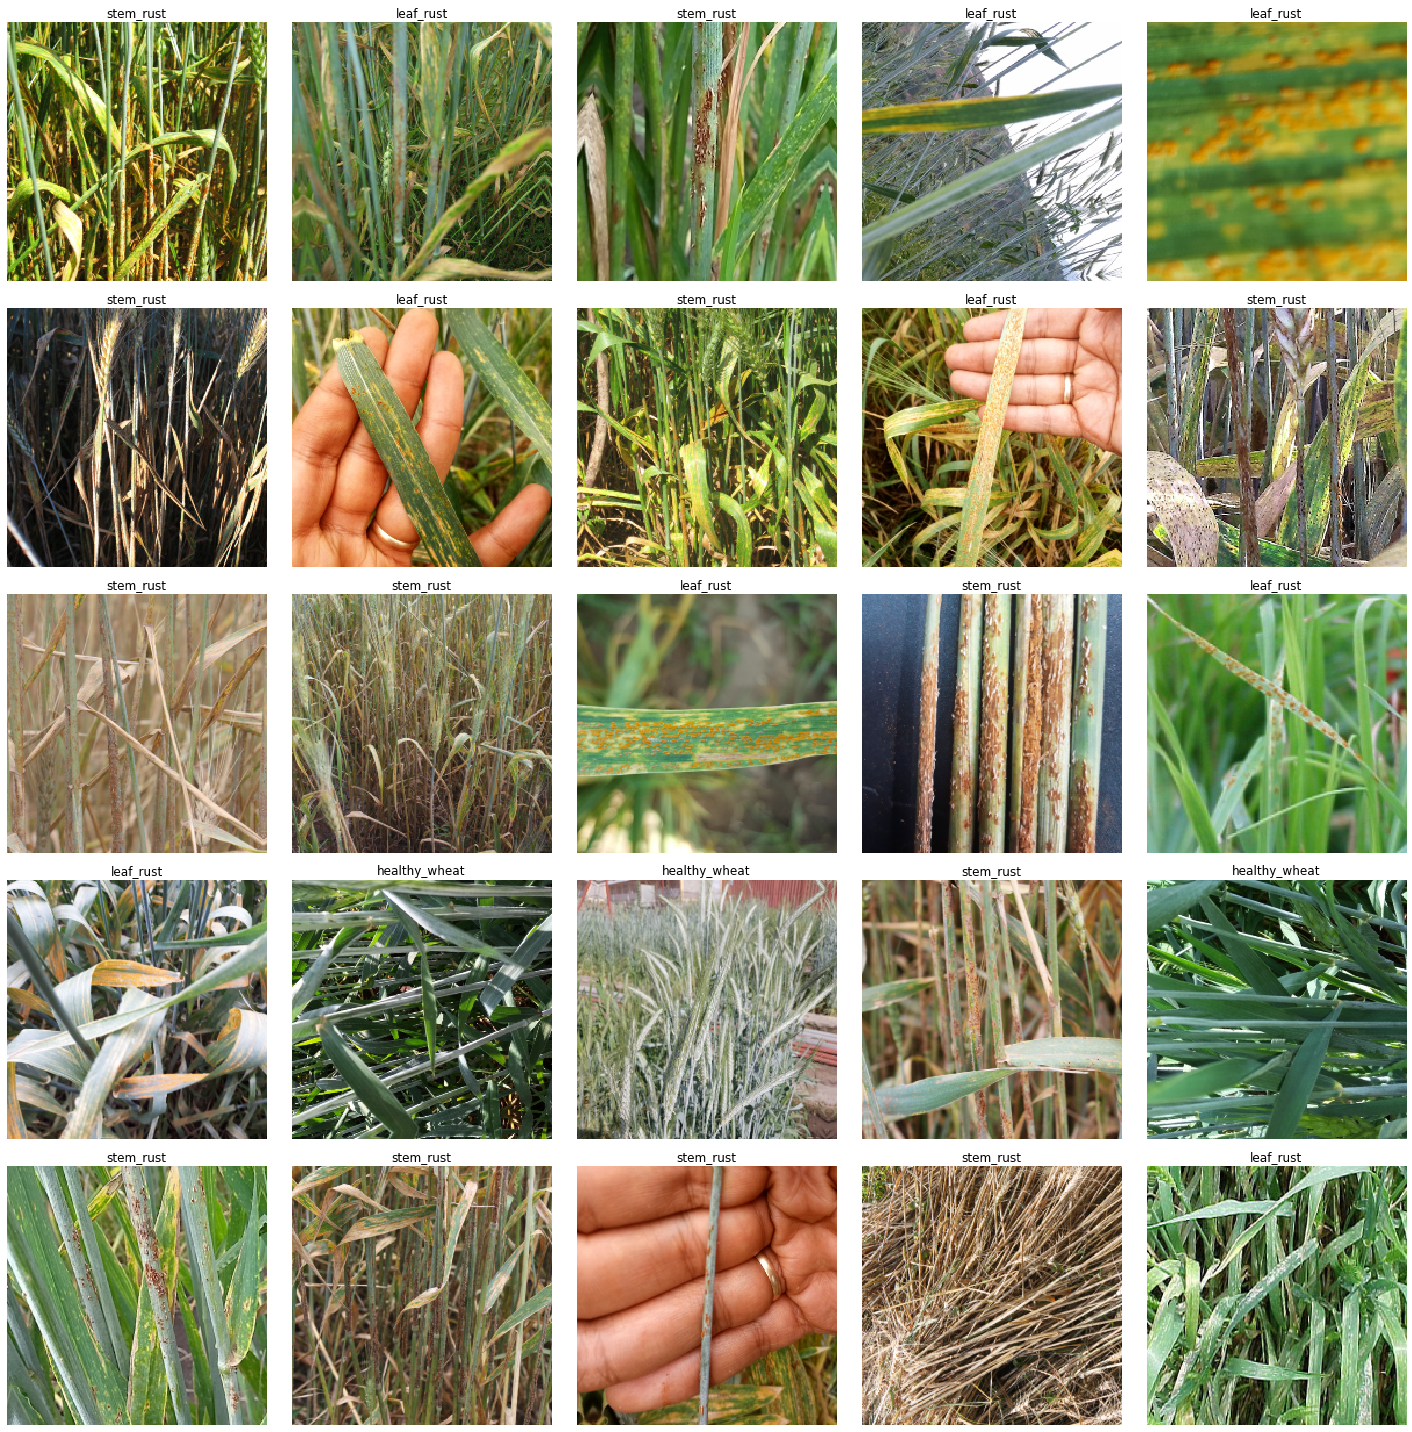

In [0]:
data.show_batch()

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-2')

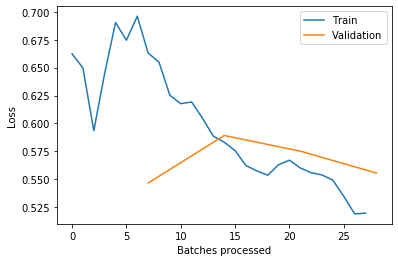

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


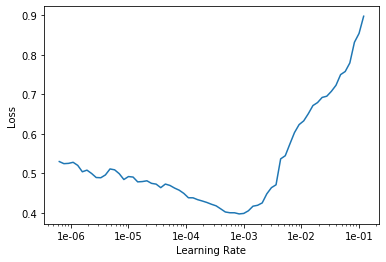

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-5, 2e-3))

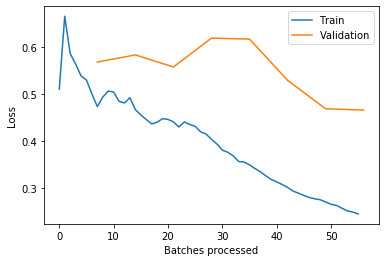

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2')

In [0]:
test_df = pd.read_csv('ICLR/sample_submission.csv')
test_df.head()

ID  leaf_rust  stem_rust  healthy_wheat
0  643083          0          0              0
1  008FWT          0          0              0
2  00AQXY          0          0              0
3  01OJZX          0          0              0
4  07OXKK          0          0              0

In [0]:
import os
names = os.listdir('ICLR/test/test')

In [0]:
test_df['name'] = test_df.apply()

In [0]:
test_df.shape

(610, 4)

In [0]:
test_path = 'ICLR/test/test'

In [0]:
learn.data.add_test(ImageList.from_folder(test_path, extensions=['.png','.jpg','.jfif','.JPG']))

In [0]:
ids = [str(path).split('/')[-1].split('.')[0] for path in list(learn.data.test_ds.items)]

In [0]:
preds,y = learn.get_preds(DatasetType.Test)

In [0]:
preds

tensor([[2.9648e-02, 8.6549e-01, 1.0486e-01],
        [4.9202e-04, 1.3997e-03, 9.9811e-01],
        [9.2420e-04, 3.0463e-02, 9.6861e-01],
        ...,
        [2.5336e-06, 1.0000e+00, 3.2979e-08],
        [4.7863e-04, 1.2155e-05, 9.9951e-01],
        [9.9418e-01, 5.7971e-03, 2.1287e-05]])

In [0]:
df = pd.DataFrame(preds.numpy())

In [0]:
df.head()

0         1         2
0  0.029648  0.865494  0.104858
1  0.000492  0.001400  0.998108
2  0.000924  0.030463  0.968612
3  0.003369  0.295593  0.701038
4  0.010415  0.020605  0.968980

In [0]:
df['ID'] = ids

In [0]:
df.head()

0         1         2      ID
0  0.029648  0.865494  0.104858  8MCLGV
1  0.000492  0.001400  0.998108  LNYFAZ
2  0.000924  0.030463  0.968612  YYBG2V
3  0.003369  0.295593  0.701038  7FBK0I
4  0.010415  0.020605  0.968980  CJI2ZI

In [0]:
df.columns = ['healthy_wheat', 'leaf_rust', 'stem_rust', 'ID']

In [0]:
df.head()

healthy_wheat  leaf_rust  stem_rust      ID
0       0.029648   0.865494   0.104858  8MCLGV
1       0.000492   0.001400   0.998108  LNYFAZ
2       0.000924   0.030463   0.968612  YYBG2V
3       0.003369   0.295593   0.701038  7FBK0I
4       0.010415   0.020605   0.968980  CJI2ZI

In [0]:
df = df[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']]

In [0]:
df.head()

ID  leaf_rust  stem_rust  healthy_wheat
0  8MCLGV   0.865494   0.104858       0.029648
1  LNYFAZ   0.001400   0.998108       0.000492
2  YYBG2V   0.030463   0.968612       0.000924
3  7FBK0I   0.295593   0.701038       0.003369
4  CJI2ZI   0.020605   0.968980       0.010415

In [0]:
df.to_csv('sample_submission.csv',index=False)